In [1]:
import sys
sys.path.insert(1, '../..')

In [2]:
import numpy as np
import pandas as pd
from medicine.models.compound import Compound
from medicine.models.medicine import Medicine
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
compound_list = []
for compound in Compound.query.all():
    medicine_list = [medicine.name for medicine in compound.medicine]
    compound_list.append(medicine_list)

F:\Python\anaconda3\lib\site-packages\sqlalchemy\engine\default.py:470: Warning: (1366, "Incorrect string value: '\\xA5x\\xA5_\\xBC\\xD0...' for column 'VARIABLE_VALUE' at row 480")
  cursor.execute(statement, parameters)


In [4]:
df = pd.DataFrame({'medicines':compound_list}, index=[c.name for c in Compound.query.all()])
df.head(5)

,medicines
滅瘢痕,[夏冰]
闢禳時疫,[半天河]
身體白駁,[半天河]
目不得瞑,"[流水, 半夏]"
汗後奔豚,"[流水, 甘草, 茯苓]"


In [5]:
te = TransactionEncoder()
te_ary = te.fit(compound_list).transform(compound_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head(10)

,丁香,三七,不灰木,丹參,丹砂,丹黍米,乳汁,乳腐,乾薑,亂發,...,鼠李,鼬鼠,齑水,齒,龍珠,龍眼,龍腦香,龍膽,龍舌草,龍葵
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

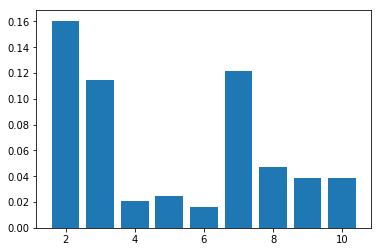

[0.1605994201728633, 0.11424804626455547, 0.02116441463954976, 0.024717697112535898, 0.01576452478825294, 0.12188057577876554, 0.04750883970758661, 0.0385650808778964, 0.03841733388027532]


In [7]:
silhouette_avgs = []
ks = range(2,11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(df)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(df, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [8]:
compound_names = [c.name for c in Compound.query.all()]
id_compound_dict = dict(zip(df.index, compound_names))
[(k, id_compound_dict[k]) for k in list(id_compound_dict.keys())[0:5]]

[(0, '滅瘢痕'), (1, '闢禳時疫'), (2, '身體白駁'), (3, '目不得瞑'), (4, '汗後奔豚')]

In [9]:
n_clusters = 3
kmeans_fit = cluster.KMeans(n_clusters = n_clusters).fit(df)

In [10]:
group = 2
ids = np.where(kmeans_fit.labels_ == group)[0]
names = [id_compound_dict[i] for i in ids]
items = [list(df.columns[df.loc[i]]) for i in ids]
group_df = pd.DataFrame(data={'name': names, 'item': items}, columns=['name', 'item'])
group_df.head(10)

,name,item
0,産後血運，心悶氣絕,"[人尿, 墨]"
1,猝心氣痛,"[人尿, 釜臍墨]"
2,水腫浮滿,"[人尿, 皂莢, 鉛]"
3,取輕粉毒,"[人尿, 土茯苓, 燒酒, 鉛]"
4,水腫尿少,"[人尿, 甘遂, 豬苓, 針砂]"
5,骨蒸發熱,"[人尿, 炭火, 理石, 雄黃]"
6,金瘡内漏,"[人尿, 雄黃]"
7,花蕊石散,"[人尿, 花乳石]"
8,五種淋疾,"[人尿, 生硝]"
9,透格散,"[人尿, 小麥, 生硝, 硝石, 通草]"
